In [1]:
#Import code from last time
%run NI3-4.ipynb

         Current function value: 0.593681
         Iterations: 100
         Function evaluations: 109
         Gradient evaluations: 109


<Figure size 640x480 with 1 Axes>

         Current function value: 0.436269
         Iterations: 100
         Function evaluations: 107
         Gradient evaluations: 107


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.26056338, 0.44281211, 0.6646853 ],
       [0.3943662 , 0.49627058, 0.38417609],
       [0.62676056, 0.47546339, 0.50844449],
       [0.79577465, 0.55155979, 0.70605062],
       [0.70422535, 0.50099435, 0.62566313],
       [0.53521127, 0.44545859, 0.31006745],
       [0.40140845, 0.50571167, 0.71815185],
       [0.12676056, 0.46588904, 0.58129533],
       [0.33098592, 0.46785659, 0.59084039],
       [0.41549296, 0.45300142, 0.64112187],
       [0.55633803, 0.43741172, 0.70009636],
       [0.5915493 , 0.3506737 , 0.61497185],
       [0.51408451, 0.36403131, 0.591378  ]])

In [3]:
testY

array([[0.38417609],
       [0.50844449],
       [0.70605062],
       [0.62566313],
       [0.31006745],
       [0.71815185],
       [0.58129533],
       [0.59084039],
       [0.64112187],
       [0.70009636],
       [0.61497185],
       [0.591378  ],
       [0.32      ]])

In [4]:
trainX

array([[0.06338028, 0.051925  , 0.42336055],
       [0.43661972, 0.14831904, 0.31155855],
       [0.57042253, 0.11211342, 0.42299539],
       [0.66901409, 0.17073406, 0.42478065],
       [0.6971831 , 0.2232566 , 0.32205711],
       [0.97183099, 0.24197469, 0.46046559],
       [0.5915493 , 0.36573346, 0.16668864],
       [0.28169014, 0.55255899, 0.40174469],
       [0.26056338, 0.37002352, 0.31647817],
       [0.46478873, 0.3325317 , 0.27086271],
       [0.99295775, 0.38788752, 0.31251205],
       [0.67605634, 0.39836394, 0.36909266],
       [0.25352113, 0.2848263 , 0.20575138],
       [0.45070423, 0.18673502, 0.17619313],
       [0.        , 0.18269477, 0.29041944],
       [0.48591549, 0.255617  , 0.24090886],
       [0.78169014, 0.23597043, 0.27408835],
       [0.8028169 , 0.16413413, 0.37090835],
       [0.3028169 , 0.17817663, 0.05869047],
       [0.47183099, 0.1639561 , 0.40032459],
       [0.41549296, 0.13324148, 0.28999341],
       [0.64788732, 0.22639902, 0.30771415],
       [0.

In [5]:
trainY

array([[0.31155855],
       [0.42299539],
       [0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.664

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 3
        self.outputLayerSize = 1
        self.hiddenLayerSize = 4
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

5.640358167747245e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

         Current function value: 0.014375
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102


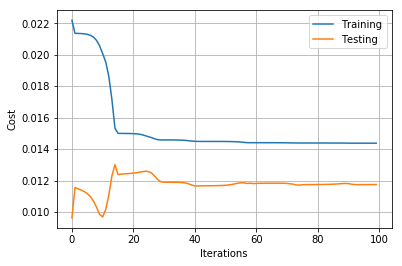

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.0221854]),
 array([0.02135325]),
 array([0.0213485]),
 array([0.02133956]),
 array([0.02132252]),
 array([0.02129003]),
 array([0.02122859]),
 array([0.02111441]),
 array([0.02090905]),
 array([0.02056344]),
 array([0.02006624]),
 array([0.01952953]),
 array([0.01862604]),
 array([0.01716482]),
 array([0.01532237]),
 array([0.01499817]),
 array([0.01499526]),
 array([0.01499425]),
 array([0.01499236]),
 array([0.01498874]),
 array([0.01498185]),
 array([0.01496893]),
 array([0.01494535]),
 array([0.01490461]),
 array([0.01484193]),
 array([0.01478026]),
 array([0.0147244]),
 array([0.01464853]),
 array([0.01459563]),
 array([0.01458329]),
 array([0.01458263]),
 array([0.01458218]),
 array([0.01458143]),
 array([0.0145801]),
 array([0.01457768]),
 array([0.01457328]),
 array([0.01456538]),
 array([0.01455183]),
 array([0.01453085]),
 array([0.01450926]),
 array([0.01449533]),
 array([0.01448741]),
 array([0.01448615]),
 array([0.01448606]),
 array([0.01448602]),
 array([0.0144

In [17]:
T.testJ

[array([0.00962816]),
 array([0.01155625]),
 array([0.01147861]),
 array([0.01140051]),
 array([0.01130438]),
 array([0.01117245]),
 array([0.01098138]),
 array([0.01070153]),
 array([0.01030928]),
 array([0.00985146]),
 array([0.00969343]),
 array([0.01016522]),
 array([0.01108098]),
 array([0.01228305]),
 array([0.01301177]),
 array([0.01237936]),
 array([0.01241208]),
 array([0.01242601]),
 array([0.01243946]),
 array([0.01245492]),
 array([0.01247434]),
 array([0.01249951]),
 array([0.01253149]),
 array([0.01256812]),
 array([0.0125957]),
 array([0.01256575]),
 array([0.01246965]),
 array([0.01226174]),
 array([0.01205002]),
 array([0.01191543]),
 array([0.01190031]),
 array([0.01189473]),
 array([0.01189425]),
 array([0.01189216]),
 array([0.01189007]),
 array([0.01188374]),
 array([0.01187154]),
 array([0.01184548]),
 array([0.01179336]),
 array([0.01171579]),
 array([0.01166514]),
 array([0.0116538]),
 array([0.01166542]),
 array([0.0116672]),
 array([0.01166962]),
 array([0.011

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.0036174031020168736

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.36050439],
       [0.34045282],
       [0.33655536],
       [0.35820363],
       [0.35507076],
       [0.37194323],
       [0.40385361],
       [0.60433449],
       [0.48873161],
       [0.43044046],
       [0.40973987],
       [0.47169795],
       [0.40842539],
       [0.32212774],
       [0.40333073],
       [0.37488417],
       [0.33872645],
       [0.32396416],
       [0.30153063],
       [0.37055632],
       [0.32848354],
       [0.35854712],
       [0.41440044],
       [0.36014109],
       [0.39614752],
       [0.39935899],
       [0.4409985 ],
       [0.37916022],
       [0.40282901],
       [0.33937129],
       [0.47817949],
       [0.44462301],
       [0.47118429],
       [0.49867584],
       [0.48560065],
       [0.46275304],
       [0.54143685],
       [0.53542778],
       [0.55776032],
       [0.6303467 ],
       [0.6366282 ],
       [0.55517179],
       [0.73812195],
       [0.74700437],
       [0.72421418],
       [0.72836209],
       [0.67648165],
       [0.618

In [21]:
y

array([[0.31155855],
       [0.42299539],
       [0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.664

In [22]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.026346654149771262

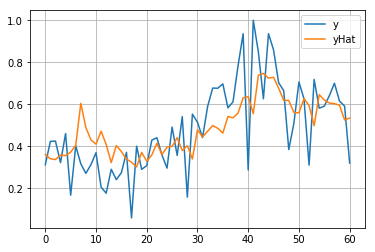

In [23]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [24]:
prediksi=NN.forward(dataprediksi)

In [25]:
prediksi

array([[0.68059142],
       [0.76964196],
       [0.66733986],
       [0.44512897]])

In [26]:
from sklearn.metrics import mean_squared_error 

In [27]:
Y_true= ([	0.50	]	,
[	0.415539889	]	,
[	0	]	,
[	0.235502358	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.16182183500240666

In [28]:
dataprediksi

array([[0.38732394, 0.79538041, 0.32      ],
       [0.37323944, 1.        , 0.5       ],
       [0.36619718, 0.70768171, 0.41553989],
       [0.44366197, 0.49169532, 0.        ]])

In [33]:
z=np.array([	0.56136209	,	0.51319034])

In [34]:
y=np.array([	0.235502358	])

In [35]:
a=np.concatenate((z,y))

In [36]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.51164313])

In [37]:
#prediksi 2
c=prediksi
z1=np.array([	0.59014524	,	0.48673204])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

array([0.5692567])

In [38]:
#prediksi 3
c=prediksi
z2=np.array([	0.52737156	,	0.43012934])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

array([0.56192217])

In [39]:
#prediksi 4
c=prediksi
z3=np.array([	0.460205	,	0.41357631])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

array([0.55855381])

In [40]:
#prediksi 5
c=prediksi
z4=np.array([	0.40834019	,	0.41626853])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

array([0.56448108])

In [41]:
#prediksi 6
c=prediksi
z5=np.array([	0.42786469	,	0.41314695])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi

array([0.56240362])